In [1]:
import PbPMethods2 as pm2
import GetPbP
from pylab import *
%matplotlib inline
import pandas as pd
import seaborn

In [2]:
df = pd.read_csv(pm2.get_gamebygame_data_filename(2016))
df.head()

,Player,Team,Pos,Game,Season,Date,TOION(60s),CFON,CAON,TOIOFF(60s),...,NZS,OZS,iG,iCF,iA1,iA2,SACFON,SACAON,SACFOFF,SACAOFF
0,Jean-Gabriel Pageau,OTT,F,20001,2016,12-Oct-16,0.173333,8,17,0.579167,...,4,2,0,1,0,0,7.764,18.239,26.342,55.038
1,Kyle Turris,OTT,F,20001,2016,12-Oct-16,0.260833,9,23,0.491667,...,3,2,1,1,0,0,8.545,24.570,25.561,48.707
2,Mark Borowiecki,OTT,D,20001,2016,12-Oct-16,0.173889,5,15,0.578611,...,5,3,0,1,0,0,4.598,16.555,29.508,56.722
3,Phil Varone,OTT,F,20001,2016,12-Oct-16,0.145556,7,14,0.606944,...,4,0,0,0,0,0,6.684,15.144,27.422,58.133
4,Bobby Ryan,OTT,F,20001,2016,12-Oct-16,0.187222,13,19,0.565278,...,5,8,1,4,0,1,12.309,20.027,21.797,53.250


In [3]:
grouped = df[['Player', 'Pos', 'iG', 'iA1', 'iA2']].groupby(['Player', 'Pos']).sum()
grouped.reset_index(inplace=True)
grouped['iP'] = grouped['iG'] + grouped['iA1'] + grouped['iA2']
grouped.head()

,Player,Pos,iG,iA1,iA2,iP
0,Aaron Ekblad,D,4,3,4,11
1,Adam Clendening,D,1,0,5,6
2,Adam Cracknell,F,7,1,2,10
3,Adam Erne,F,0,0,0,0
4,Adam Henrique,F,7,7,4,18


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


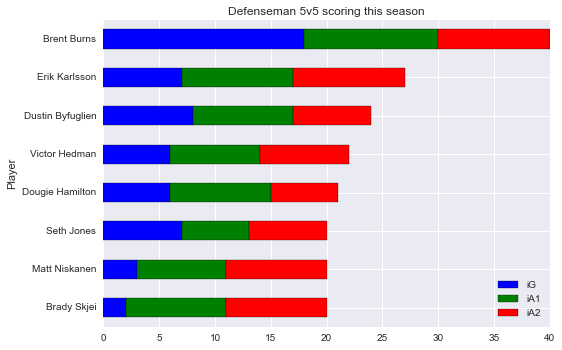

In [4]:
topd = grouped[(grouped.iP >= 20) & (grouped.Pos == 'D')]
topd.set_index(['Player'], inplace=True)
topd.sort_values(by='iP', inplace=True)
topd = topd[['iG', 'iA1', 'iA2']]
topd.plot.barh(stacked=True, title = 'Defenseman 5v5 scoring this season')

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


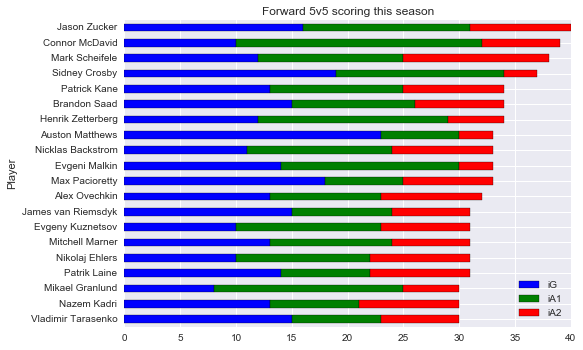

In [5]:
topf = grouped[(grouped.iP >= 30) & (grouped.Pos == 'F')]
topf.set_index(['Player'], inplace=True)
topf.sort_values(by='iP', inplace=True)
topf = topf[['iG', 'iA1', 'iA2']]
topf.plot.barh(stacked=True, title = 'Forward 5v5 scoring this season')